In [1]:
import numpy as np
from PQmodel import PQ 
import matplotlib.pylab as plt
from sklearn.metrics import f1_score, classification_report
from Tools import *
from keras.models import load_model
import joblib 
plt.rcParams.update({'font.size': 24})
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
catalog=['Pure sinusoidal', 'Sag', 'Swell','Interruption','Spike',
         'Oscillatory','Harmonics','Harmonics with Sag', 'Harmonics with Swell',
         'Flicker', 'Flicker with Sag', 'Flicker with Swell', 'Sag with Oscillatory transient',
         'Swell with Oscillatory transient', 'Sag with Harmonics', 'Swell with Harmonics', 'Notch',
         'Harmonics with Sag with Flicker', 'Harmonics with Swell with Flicker',  'Sag with Harmonics with Flicker',
         'Swell with Harmonics with Flicker', 'Sag with Harmonics with Oscillatory transient',
         'Swell with Harmonics with Oscillatory transient', 'Harmonics with Sag with Oscillatory transient',
         'Harmonics with Swell with Oscillatory transient','Harmonics with Sag with Flicker with Oscillatory transient',
         'Harmonics with Swell with Flicker with Oscillatory transient', 'Sag with Harmonics with Flicker with Oscillatory transient',
         'Swell with Harmonics with Flicker with Oscillatory transient']

In [3]:
DT = joblib.load('Models/DT_model.pkl')
SVM = joblib.load('Models/SVM_model.pkl')
CNN = load_model('Models/CNN_model.h5')

In [4]:
ciclos = 10
freq =60
fs =3600
mpc= fs/freq
Model = PQ(Cicles=ciclos,FS=fs,Frecuency=freq,InicioDisturbio=0,PeriodoDisturbio=5)
t = np.linspace(0,ciclos/freq,int(mpc*ciclos))
Signal_List = [0,1,2,3,4,5,6,9,16] #[1,2,3,4,5]#
Sig_names = np.array(catalog)[Signal_List].tolist()
Signas_perEvent=50
a = Model.PQselectivo(Signas_perEvent,Signal_List)

In [5]:
data,y = build_data(a,t)
n_signals = len(Signal_List)
data = data.reshape(n_signals*Signas_perEvent,int(mpc*ciclos),1)
data_ml,y_ml = build_featdata(a,Signal_List)

In [6]:
prediccion= CNN.predict(data)
y_pred = np.argmax(prediccion, axis=1)  
y_true = np.argmax(y, axis=1)
f1_CNN = f1_score(y_pred, y_true, average=None)  # Puedes elegir 'macro', 'micro' o 'weighted'
print("F1-score (CNN-Model):", f1_CNN)

15/15 [==============================] - 11s 25ms/step
F1-score (CNN-Model): [0.4        0.95833333 0.98989899 0.96153846 0.51485149 0.96907216
 0.58823529 0.9009009  0.60714286]


In [7]:
pred_svm= SVM.predict(data_ml)
f1_SVM = f1_score(pred_svm, y_ml, average=None)  # Puedes elegir 'macro', 'micro' o 'weighted'
print("F1-score (SVM-Model):", f1_SVM)

F1-score (SVM-Model): [0.75590551 0.98       0.94949495 0.99009901 0.68292683 0.87234043
 0.70454545 0.89795918 0.61261261]


In [8]:
pred_DT= DT.predict(data_ml)
f1_DT = f1_score(pred_DT, y_ml, average=None)  # Puedes elegir 'macro', 'micro' o 'weighted'
print("F1-score (DT-Model):", f1_DT)

F1-score (DT-Model): [0.95049505 0.95238095 1.         0.94736842 0.9375     0.86021505
 0.79591837 0.98039216 0.70909091]


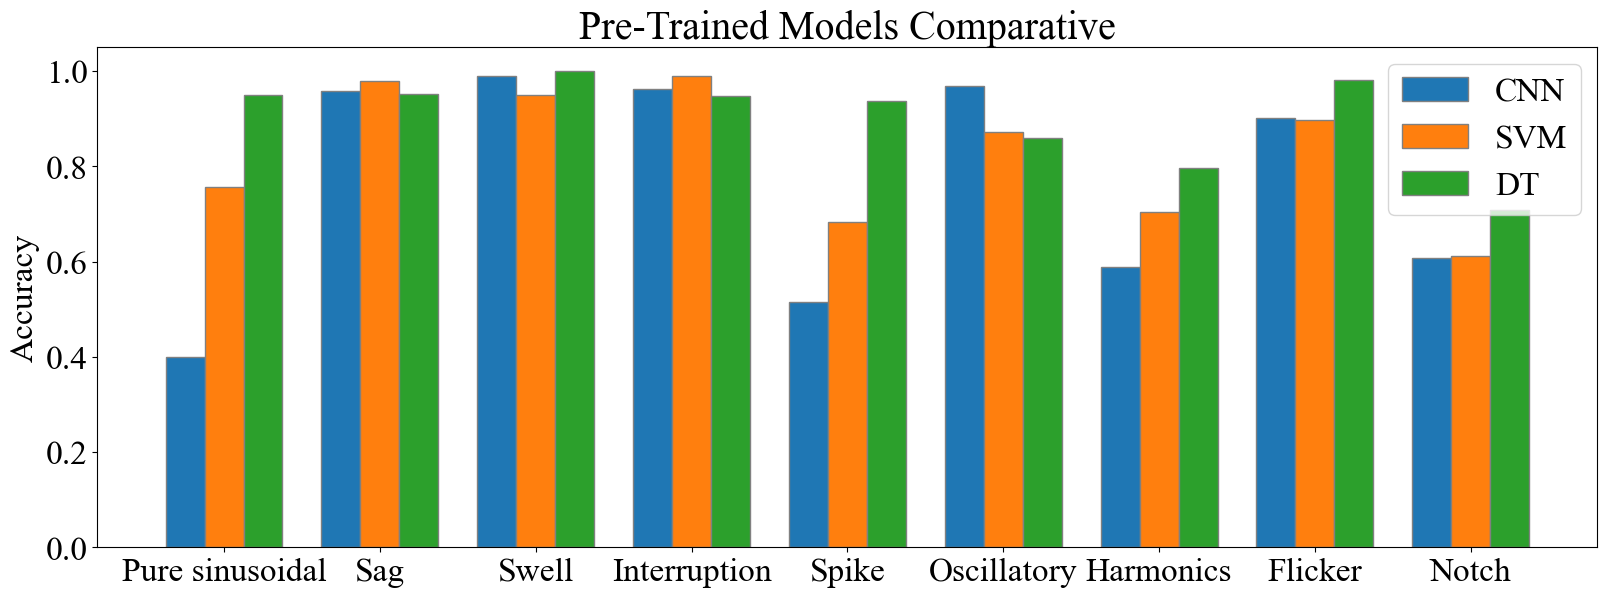

In [33]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
barWidth = 0.25

# Set position of bar on X axis 
br1 = np.arange(len(Sig_names)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 


ax.bar(br1,f1_CNN, width = barWidth, 
        edgecolor ='grey', label ='CNN')
ax.bar(br2,f1_SVM,width = barWidth, 
        edgecolor ='grey', label ='SVM')
ax.bar(br3,f1_DT,width = barWidth, 
        edgecolor ='grey', label ='DT')

ax.set_ylabel('Accuracy')
ax.set_title('Pre-Trained Models Comparative')

ax.set_xticks([r + barWidth for r in range(len(Sig_names))], 
        Sig_names)

ax.legend()

plt.savefig('Figures/barplot_Comparative.png',dpi=200, format='png', bbox_inches='tight')
plt.show()

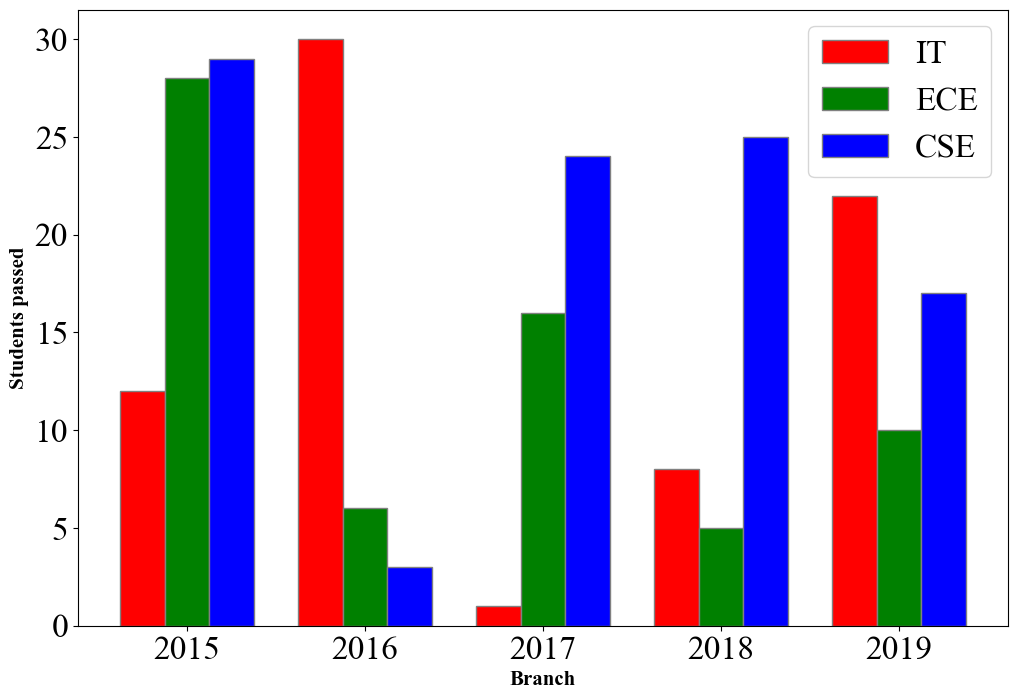

In [22]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# set height of bar 
IT = [12, 30, 1, 8, 22] 
ECE = [28, 6, 16, 5, 10] 
CSE = [29, 3, 24, 25, 17] 

# Set position of bar on X axis 
br1 = np.arange(len(IT)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth, 
        edgecolor ='grey', label ='IT') 
plt.bar(br2, ECE, color ='g', width = barWidth, 
        edgecolor ='grey', label ='ECE') 
plt.bar(br3, CSE, color ='b', width = barWidth, 
        edgecolor ='grey', label ='CSE') 

# Adding Xticks 
plt.xlabel('Branch', fontweight ='bold', fontsize = 15) 
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(IT))], 
        ['2015', '2016', '2017', '2018', '2019'])

plt.legend()
plt.show() 